<a href="https://colab.research.google.com/github/D-art9/Linear-regression-mini-projects/blob/main/Movie_Revenue_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
API_KEY = "e8f17bbdae7c30ac355d5e9ea87ef7a8"
BASE_URL = "https://api.themoviedb.org/3"


Predict a movie’s rating (vote_average) using just its runtime (minutes) and budget (USD).

In [2]:
import requests

url = f"{BASE_URL}/movie/popular?api_key={API_KEY}&language=en-US&page=1"
response = requests.get(url)
data = response.json()

# Extract movie IDs
movie_ids = [movie["id"] for movie in data["results"]]
print(movie_ids[:5])  # Show first 5 IDs


[755898, 1061474, 1234821, 1241470, 1195631]


In [3]:
movie_id = movie_ids[0]  # Take first movie
url = f"{BASE_URL}/movie/{movie_id}?api_key={API_KEY}&language=en-US"
response = requests.get(url)
movie_details = response.json()

print({
    "title": movie_details["title"],
    "budget": movie_details["budget"],
    "runtime": movie_details["runtime"],
    "rating": movie_details["vote_average"]
})


{'title': 'War of the Worlds', 'budget': 65000000, 'runtime': 91, 'rating': 4.223}


In [4]:
import pandas as pd

movies_data = []

# Loop through first 50 movie IDs
for movie_id in movie_ids[:50]:
    url = f"{BASE_URL}/movie/{movie_id}?api_key={API_KEY}&language=en-US"
    response = requests.get(url)
    details = response.json()

    # Store only the fields we need
    movies_data.append({
        "title": details.get("title"),
        "budget": details.get("budget"),
        "runtime": details.get("runtime"),
        "rating": details.get("vote_average"),
        "revenue": details.get("revenue")
    })

# Convert to DataFrame
df = pd.DataFrame(movies_data)

# Save to CSV
df.to_csv("movies_dataset.csv", index=False)

print(df.head())


                    title     budget  runtime  rating    revenue
0       War of the Worlds   65000000       91   4.223          0
1                Superman  225000000      130   7.676  588068636
2  Jurassic World Rebirth  180000000      134   6.370  810945902
3                  Osiris          0      105   6.412          0
4            William Tell          0      133   6.306     264637


In [5]:
df = df.dropna()
#helps to drop any empty values

In [6]:
df = df[(df['budget'] > 0) & (df['runtime'] > 0)]
#adds a dataframe filter to remove any values that are less than 0

In [7]:
df = df.drop_duplicates()


In [8]:
print(df.shape)


(12, 5)


In [9]:
print(df.head())


                                            title     budget  runtime  rating  \
0                               War of the Worlds   65000000       91   4.223   
1                                        Superman  225000000      130   7.676   
2                          Jurassic World Rebirth  180000000      134   6.370   
6  Demon Slayer: Kimetsu no Yaiba Infinity Castle   68000000      155   7.196   
8                        How to Train Your Dragon  150000000      125   8.024   

     revenue  
0          0  
1  588068636  
2  810945902  
6  148000000  
8  624430335  


CLEANING THE DATASET


In [10]:
df = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['runtime'] > 0)]


In [11]:
df = df[df['budget'] < 500000000]
df = df[df['runtime'] < 300]
df = df[df['rating'] <= 10]
#removing outliers

In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    11 non-null     object 
 1   budget   11 non-null     int64  
 2   runtime  11 non-null     int64  
 3   rating   11 non-null     float64
 4   revenue  11 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 528.0+ bytes
None


In [13]:
df["budget"] = df["budget"].astype(float)
df["revenue"] = df["revenue"].astype(float)


NORMALISING THE VALUES

In [15]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ["budget", "runtime", "rating", "revenue"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

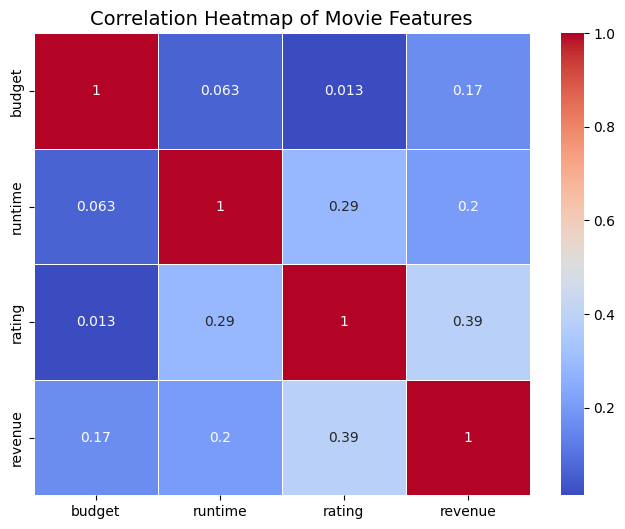

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Movie Features", fontsize=14)
plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [19]:
df = pd.read_csv("movies_dataset.csv")

In [20]:
X = df[['budget', 'runtime', 'rating']]   # input features
y = df['revenue']                         # target (what we want to predict)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

In [24]:
example = pd.DataFrame(
    [[100000000, 120, 7.5]],
    columns=['budget', 'runtime', 'rating']
)
predicted_revenue = model.predict(example)
print("\nPredicted Revenue for Example Movie:", predicted_revenue[0])


Predicted Revenue for Example Movie: 406858781.7028286
